In [2]:
from pathlib import Path

import pandas as pd

In [4]:
def import_perf_data(dir):
    all_files = Path(dir).glob('perf.*.csv')
    all_data = [pd.read_csv(path, index_col=None) for path in all_files]
    return pd.concat(all_data, axis=0, ignore_index=True)


data_dir = "./exp-local/data/info"
data = import_perf_data(data_dir)


def extract_params_from_local_file_name(dat):
    dat[['Workflow', 'mode', 'ncores', 'node', 'trial']] = dat.JobName.str.extract(
        r'(\w+)-(\w+)-nc(\d+)_(\w+?\d+)-(\d+).cfg')
    dat.ncores = dat.ncores.astype(int)
    dat.trial = dat.trial.astype(int)
    return dat


data = extract_params_from_local_file_name(data)
data

,JobName,power_energy_pkg,power_energy_ram,perf_elapsed,Workflow,mode,ncores,node,trial
0,daa-local-nc4_gl5-31.cfg,5015200.29,456260.04,65406.942966,daa,local,4,gl5,31
1,daa-local-nc4_gl5-32.cfg,5001768.76,451293.09,65062.053712,daa,local,4,gl5,32
2,daa-local-nc4_gl5-33.cfg,5213629.43,469272.01,69104.943565,daa,local,4,gl5,33
3,daa-local-nc4_gl5-34.cfg,5018646.49,451528.87,65681.039591,daa,local,4,gl5,34
4,daa-local-nc4_gl5-35.cfg,4976539.42,448293.87,64589.575284,daa,local,4,gl5,35
...,...,...,...,...,...,...,...,...,...
129,dpp-local-nc32_ss2-3.cfg,158036.47,15323.20,1791.776936,dpp,local,32,ss2,3
130,dpp-local-nc32_ss2-4.cfg,141244.98,13540.12,1374.758616,dpp,local,32,ss2,4
131,dpp-local-nc32_ss2-5.cfg,135875.08,12857.83,1269.945625,dpp,local,32,ss2,5
132,dpp-local-nc32_ss2-6.cfg,149251.96,14422.82,1557.443078,dpp,local,32,ss2,6


C:\Users\Dmitrijs\AppData\Local\Temp\ipykernel_3896\2689750493.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=-75)
C:\Users\Dmitrijs\AppData\Local\Temp\ipykernel_3896\2689750493.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=-75)
C:\Users\Dmitrijs\AppData\Local\Temp\ipykernel_3896\2689750493.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=-75)


[Text(0, 0, 'dpp-local-nc4_gl6-40.cfg'),
 Text(1, 0, 'daa-local-nc16_gl6-34.cfg'),
 Text(2, 0, 'daa-local-nc4_ss2-1.cfg'),
 Text(3, 0, 'dpp-local-nc32_ss2-1.cfg'),
 Text(4, 0, 'daa-local-nc4_gl5-38.cfg'),
 Text(5, 0, 'daa-local-nc4_ss2-7.cfg'),
 Text(6, 0, 'dpp-local-nc32_gl6-38.cfg'),
 Text(7, 0, 'dpp-local-nc32_gl6-33.cfg'),
 Text(8, 0, 'dpp-local-nc32_gl6-39.cfg'),
 Text(9, 0, 'dpp-local-nc32_gl6-32.cfg'),
 Text(10, 0, 'dpp-local-nc32_gl6-37.cfg'),
 Text(11, 0, 'dpp-local-nc32_gl6-40.cfg'),
 Text(12, 0, 'dpp-local-nc16_ss2-3.cfg'),
 Text(13, 0, 'dpp-local-nc16_ss2-2.cfg'),
 Text(14, 0, 'dpp-local-nc16_gl6-35.cfg'),
 Text(15, 0, 'dpp-local-nc16_gl6-40.cfg'),
 Text(16, 0, 'dpp-local-nc16_gl6-36.cfg'),
 Text(17, 0, 'dpp-local-nc16_gl6-34.cfg'),
 Text(18, 0, 'dpp-local-nc16_gl6-32.cfg'),
 Text(19, 0, 'dpp-local-nc16_gl6-33.cfg'),
 Text(20, 0, 'dpp-local-nc8_gl5-38.cfg'),
 Text(21, 0, 'dpp-local-nc8_gl5-37.cfg'),
 Text(22, 0, 'dpp-local-nc8_ss2-5.cfg'),
 Text(23, 0, 'dpp-local-nc8_gl6-31

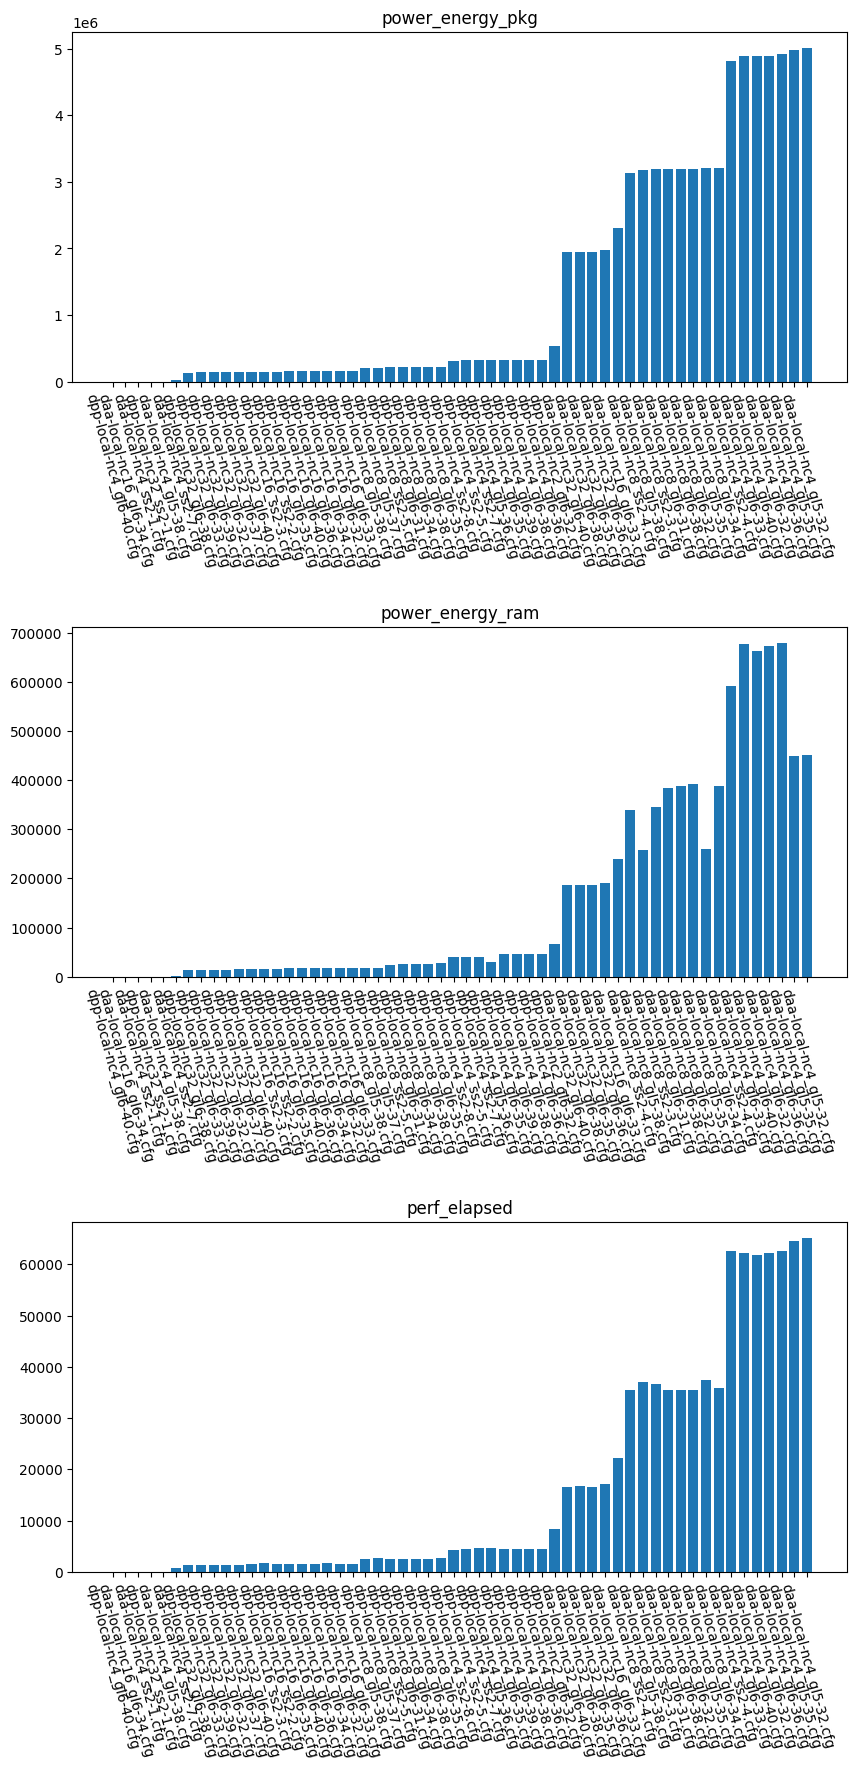

In [33]:
# create 3 separate plots each having JobName and another column

import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 20))
# increase vertical space
fig.subplots_adjust(hspace=.7)

data.sort_values(by=['power_energy_pkg'], inplace=True)

# plot 1
axs[0].bar(data['JobName'], data.power_energy_pkg)
axs[0].set_title('power_energy_pkg')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=-75)

# plot 2
axs[1].bar(data['JobName'], data.power_energy_ram)
axs[1].set_title('power_energy_ram')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=-75)

# plot 3
axs[2].bar(data['JobName'], data.perf_elapsed)
axs[2].set_title('perf_elapsed')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=-75)


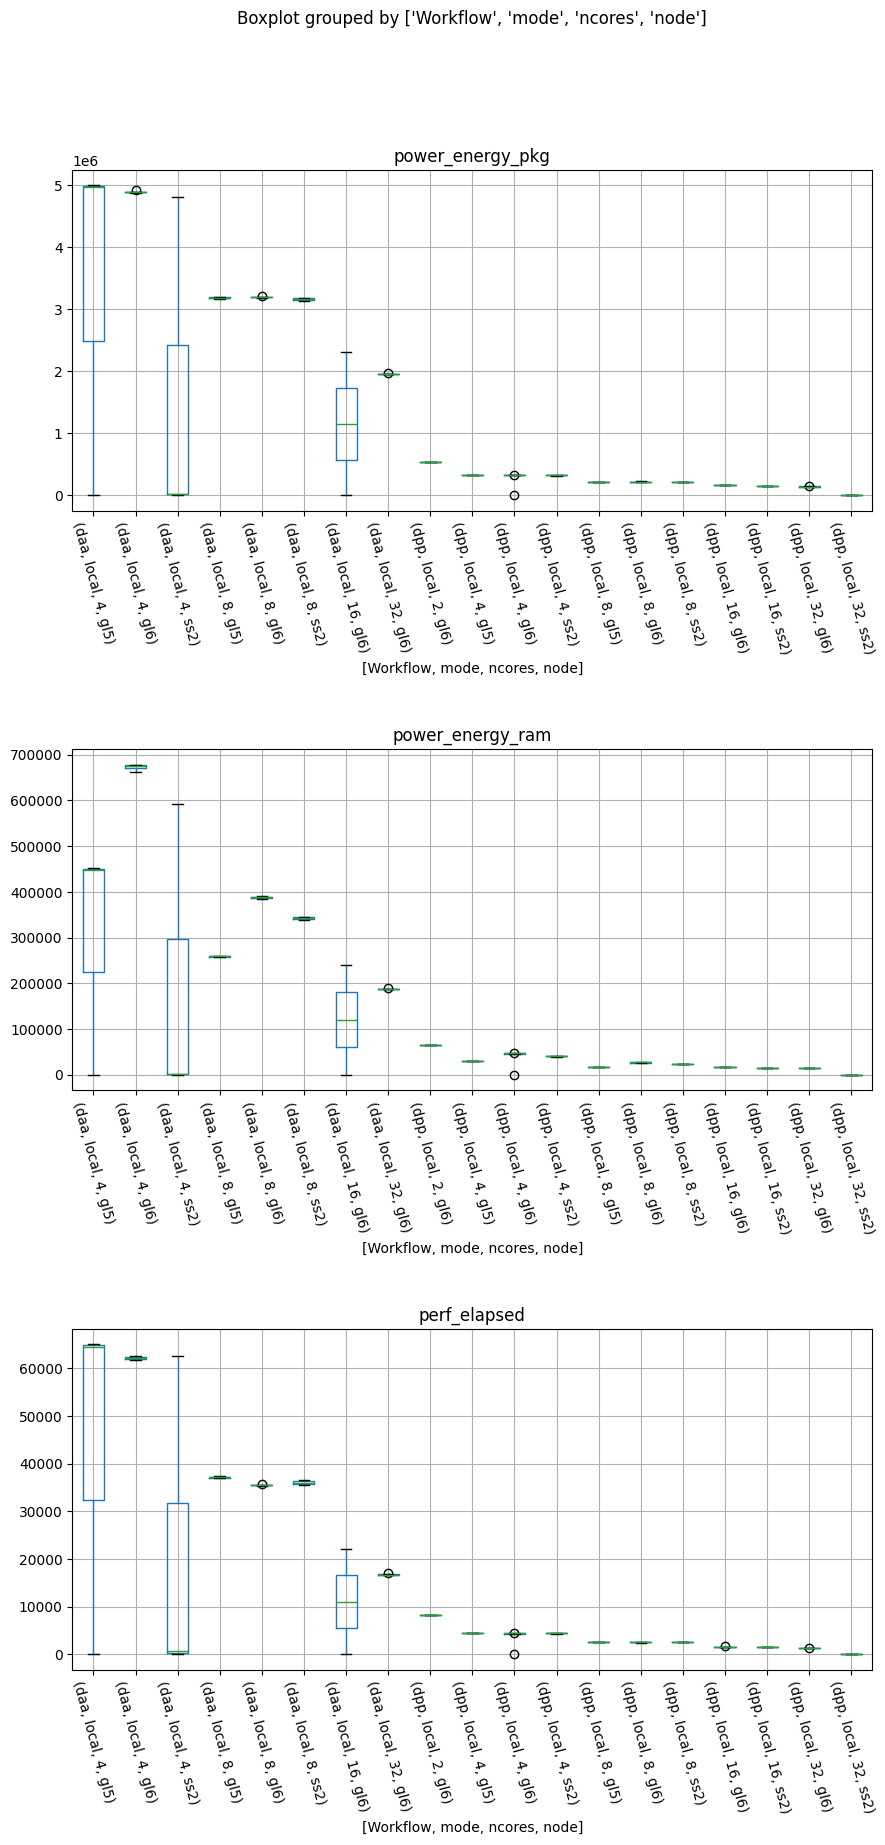

In [41]:
# create similar 3 plots buy boxplots, make sure to group them by workflow, mode, ncores, node

fig, axs = plt.subplots(3, 1, figsize=(10, 20))
# increase vertical space
fig.subplots_adjust(hspace=.7)

# plot 1
data.boxplot(column=['power_energy_pkg'], by=['Workflow', 'mode', 'ncores', 'node'], ax=axs[0])
axs[0].set_title('power_energy_pkg')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=-75)

# plot 2
data.boxplot(column=['power_energy_ram'], by=['Workflow', 'mode', 'ncores', 'node'], ax=axs[1])
axs[1].set_title('power_energy_ram')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=-75)

# plot 3
data.boxplot(column=['perf_elapsed'], by=['Workflow', 'mode', 'ncores', 'node'], ax=axs[2])
axs[2].set_title('perf_elapsed')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=-75)

# save it to file
plt.savefig('energy.boxplots.png')